2️⃣ Data Loading & Exploration

Goal: Load the dataset and explore its structure.

✅ Tasks:

Load data using pandas.read_csv().

Check columns: df.columns.

Preview rows: df.head().

Identify missing values: df.isnull().sum().

✅ Tools:

pandas

📌 Key columns:

date, location, total_cases, total_deaths, new_cases, new_deaths, total_vaccinations, etc.

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')
print(df.columns)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
print(df.head())

print(df.isnull().sum().to_string())



Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

3️⃣ Data Cleaning

Goal: Prepare data for analysis.

✅ Tasks:

Filter countries of interest (e.g., Kenya, USA, India).

Drop rows with missing dates/critical values.

Convert date column to datetime: pd.to_datetime().

Handle missing numeric values with fillna() or interpolate().

✅ Tools:

pandas

In [88]:
country_interest = df[df['iso_code'].isin(['IND', 'USA', 'KEN'])]
# print(country_interest.head(2000).to_string())


# to drop rows with missing dates/critical values.
country_interest = country_interest.dropna(subset=['date'])
df = df.dropna(subset=['date'])
df = df.dropna(subset=['continent'])


# to Convert date column to datetime: pd.to_datetime().
country_interest['date'] = pd.to_datetime(country_interest['date'])
df['date'] = pd.to_datetime(df['date'])
# print(country_interest_clean_date.dtypes)

# to Handle missing numeric values with fillna() or interpolate().

country_interest.fillna(country_interest.mean(numeric_only=True), inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

# print(country_interest_clean_date[['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'tests_units']].tail(20000).to_string())

country_interest.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'tests_units'], inplace=True)
df.drop(columns=['weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'tests_units'], inplace=True)
# print(country_interest.isnull().sum().to_string())
# print(df.isnull().sum().to_string())
print(country_interest.head(10))


       iso_code continent location       date   total_cases  new_cases  \
120683      IND      Asia    India 2020-01-03  2.515927e+07        0.0   
120684      IND      Asia    India 2020-01-04  2.515927e+07        0.0   
120685      IND      Asia    India 2020-01-05  2.515927e+07        0.0   
120686      IND      Asia    India 2020-01-06  2.515927e+07        0.0   
120687      IND      Asia    India 2020-01-07  2.515927e+07        0.0   
120688      IND      Asia    India 2020-01-08  2.515927e+07        0.0   
120689      IND      Asia    India 2020-01-09  2.515927e+07        0.0   
120690      IND      Asia    India 2020-01-10  2.515927e+07        0.0   
120691      IND      Asia    India 2020-01-11  2.515927e+07        0.0   
120692      IND      Asia    India 2020-01-12  2.515927e+07        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
120683        41459.204728  336147.94048         0.0           463.978596   
120684        41459.204728  336

4️⃣ Exploratory Data Analysis (EDA)

Goal: Generate descriptive statistics & explore trends.

✅ Tasks:

Plot total cases over time for selected countries.

Plot total deaths over time.

Compare daily new cases between countries.

Calculate the death rate: total_deaths / total_cases.

✅ Visualizations:

Line charts (cases & deaths over time).

Bar charts (top countries by total cases).

Heatmaps (optional for correlation analysis).

✅ Tools:

matplotlib

seaborn

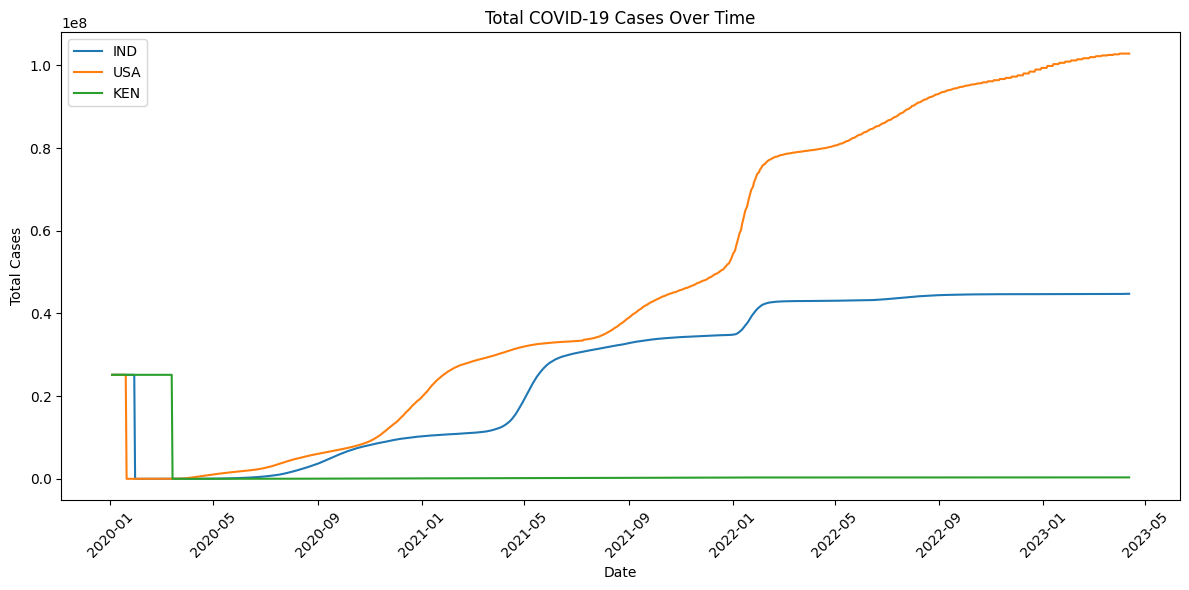

In [89]:
countries = ['IND', 'USA', 'KEN']
# plott of total cases over time for the selected countries

plt.figure(figsize=(12, 6))
for country in countries:
    country_data = country_interest[country_interest['iso_code'] == country]
    # sort the date
    country_data = country_data.sort_values(by='date')
    
    plt.plot(country_data['date'], country_data['total_cases'], label=country)


# add a label and legend
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total COVID-19 Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


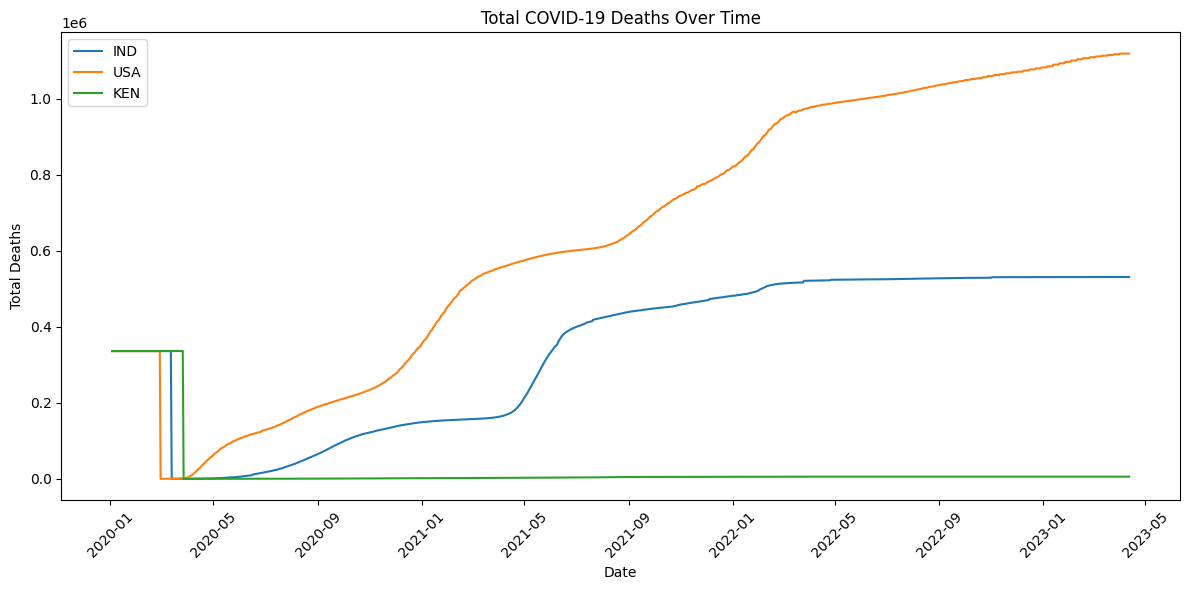

In [90]:
# plot of total deaths over time for the selected countries
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = country_interest[country_interest['iso_code'] == country]
    # sort the date
    country_data = country_data.sort_values(by='date')
    
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)

# add a label and legend
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total COVID-19 Deaths Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

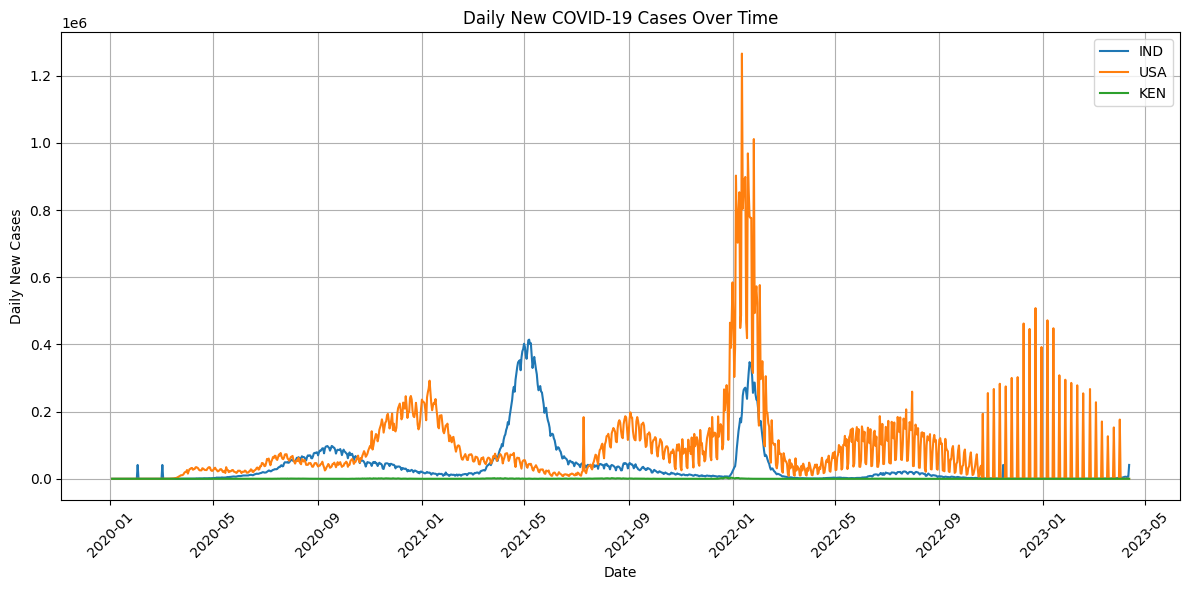

In [91]:
plt.figure(figsize=(12, 6))
# Loop through each selected country and plot their daily new cases
for country in countries:
    country_data = country_interest[country_interest['iso_code'] == country]
    country_data = country_data.sort_values('date')
    plt.plot(country_data['date'], country_data['new_cases'], label=country)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Daily New Cases')
plt.title('Daily New COVID-19 Cases Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [92]:
# Group by country and get the latest data (you can also use .max() if appropriate)
latest_data = country_interest.sort_values('date').groupby('iso_code').last()

# Calculate the death rate
latest_data['death_rate'] = latest_data['total_deaths'] / latest_data['total_cases']

# Display the death rate for selected countries
selected_countries = ['KEN', 'IND', 'USA']  # Replace as needed
death_rates = latest_data.loc[selected_countries, 'death_rate']

print(death_rates)

iso_code
KEN    0.016583
IND    0.011861
USA    0.010875
Name: death_rate, dtype: float64


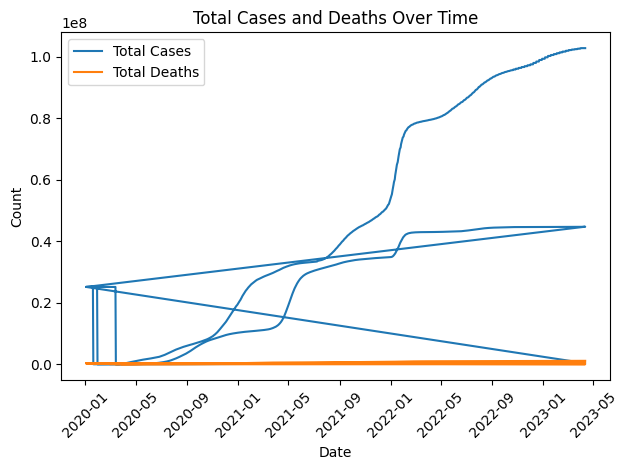

In [93]:
# Line charts (cases & deaths over time).
plt.plot(country_interest['date'], country_interest['total_cases'], label='Total Cases')
plt.plot(country_interest['date'], country_interest['total_deaths'], label='Total Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Total Cases and Deaths Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

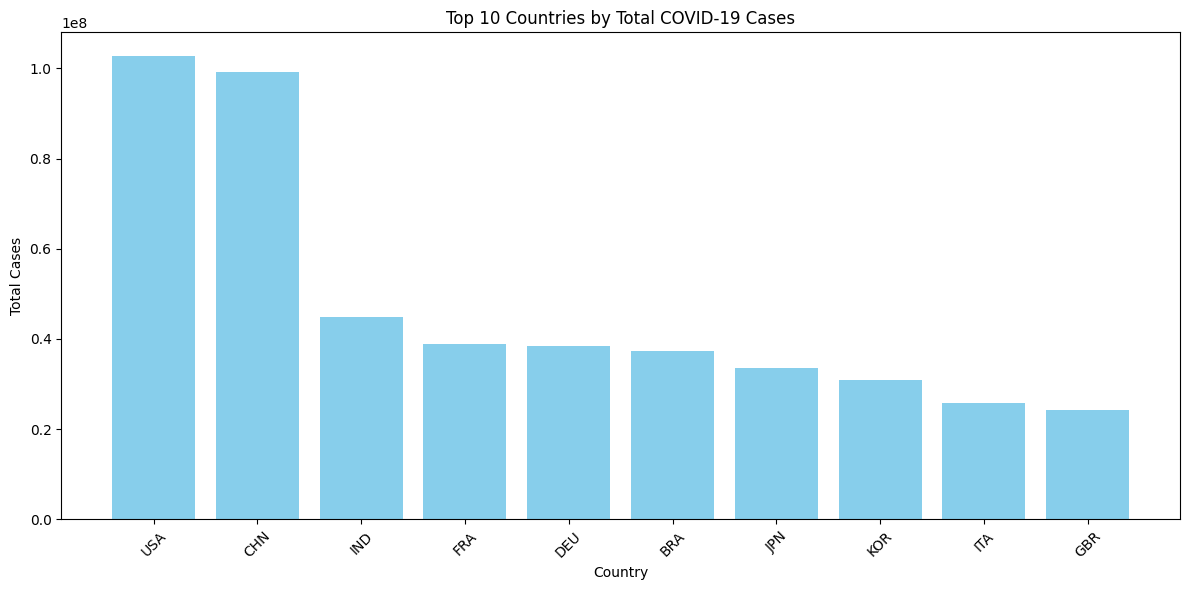

In [94]:
# Group by location and get the latest total_cases
latest_data = df.sort_values('date').groupby('iso_code').last()


# Sort and select top 10 countries
top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_countries.index, top_countries['total_cases'], color='skyblue')

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Total Cases')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5️⃣ Visualizing Vaccination Progress

Goal: Analyze vaccination rollouts.

✅ Tasks:

Plot cumulative vaccinations over time for selected countries.

Compare % vaccinated population.

✅ Charts:

Line charts.

Optional: Pie charts for vaccinated vs. unvaccinated.

✅ Tools:

matplotlib

seaborn

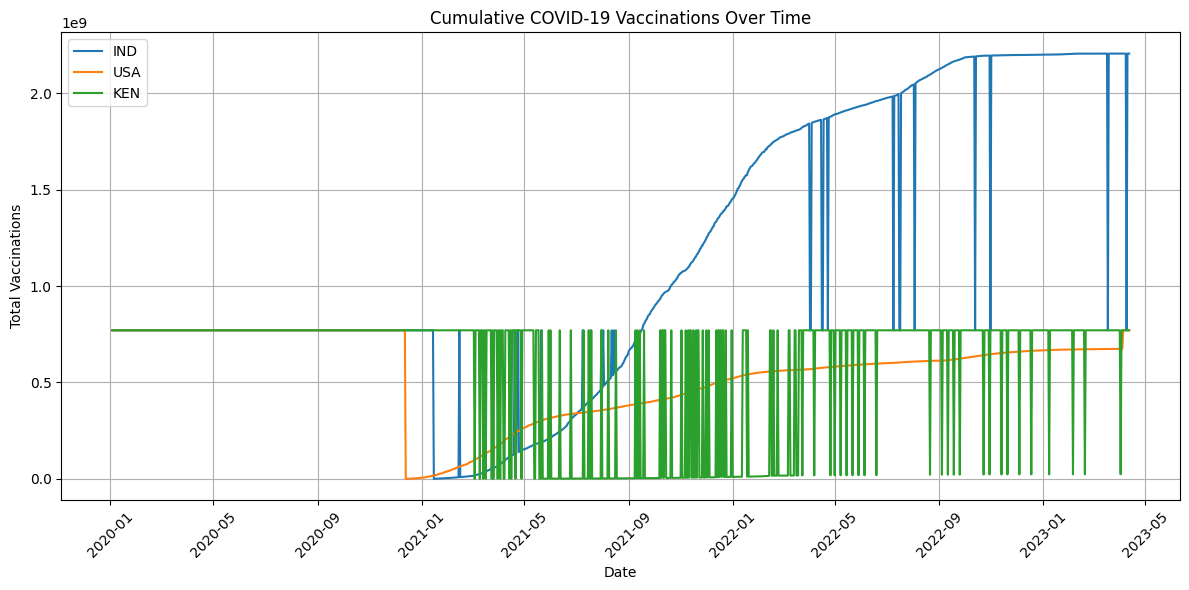

In [95]:
#  to Plot cumulative vaccinations over time for selected countries.

# Loop through each country and plot total_vaccinations
figsize=(12, 6)
plt.figure(figsize=figsize)
for country in countries:
    country_data = country_interest[country_interest['iso_code'] == country]
    country_data = country_data.sort_values('date')

    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
# sort by date and keep the latest entry for each location
latest_vax = df.sort_values('date').groupby('iso_code', as_index=False).last()

# Select relevant vaccination columns
vax_data = latest_vax[[
    'iso_code', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred'
]]

# sort by fully vaccinated percentage in decending order
vax_data_sorted = vax_data.sort_values(by="people_fully_vaccinated_per_hundred", ascending=False)

# Display the top 10 countries
print(vax_data_sorted.head(10).to_string())

     iso_code  people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  total_boosters_per_hundred
127       MAC                      97.760000                                92.36                   69.090000
90        HKG                      92.340000                                90.78                   94.000000
223       TWN                      91.580000                                86.91                  105.190000
227       URY                      87.920000                                84.79                   90.590000
163  OWID_CYN                      50.916003                                81.78                   35.158537
103       ITA                      86.200000                                81.26                   79.600000
149       MYS                      82.900000                                81.17                   50.520000
0         ABW                      84.900000                                79.11                   35.158537
7         

**NARRATIVE**
- USA led with total cases 
- USA led with total deaths
- USA led with daily new cases around 2022-01
- Among Kenya, USA and India, Kenya led with death rates

**ANOMALIES**
- Around 2021 kenya's total vaccination was rapidly droping down to about 0 and rapidly incresing again to the same level again

